<a href="https://colab.research.google.com/github/whsh99/algorithm/blob/main/time_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

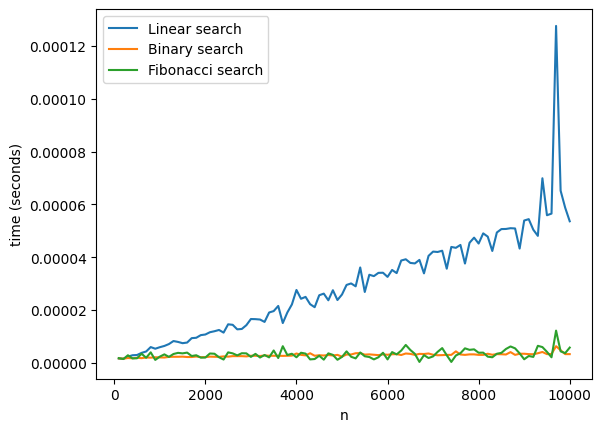

In [33]:
import time
import random
import matplotlib.pyplot as plt

# Define linear search function
def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i  # Found the element, return its index
    return -1  # Element not found, return -1

# Define binary search function
def binary_search(arr, x):
    lo, hi = 0, len(arr) - 1
    while lo <= hi:
        mi = (lo + hi) // 2
        if arr[mi] == x:
            return mi  # Found the element, return its index
        elif arr[mi] < x:
            lo = mi + 1  # Update the loer bound
        else:
            hi = mi - 1  # Update the upper bound
    return -1  # Element not found, return -1

# Define Fibonacci search function
def fibonacci_search(arr, x):
    if x > arr[-1]:
        return -1  # Element not found, return -1

    f2, f1 = 0, 1
    f = f2 + f1
    while f < len(arr):
        f2, f1 = f1, f
        f = f2 + f1
    offset = -1
    while f > 1:
        i = min(offset + f2, len(arr) - 1)
        if i >= 0 and i < len(arr):  # Check if i is within valid range
            if arr[i] < x:
                f, f1 = f1, f2
                f2 = f - f1
                offset = i
            elif arr[i] > x:
                f, f2 = f2, f1
                f1 = f - f2
            else:
                return i  # Found the element, return its index
        else:
            break  # If i is out of range, break the loop
    if f1 and offset < len(arr) - 1 and arr[offset + 1] == x:
        return offset + 1  # Found the element, return its index
    return -1  # Element not found, return -1

# Generate random list and target integer
def random_data(n):
    arr = [random.randint(1, n * 10) for _ in range(n)]
    x = random.randint(1, n * 10)
    return arr, x

# Execute algorithms and measure execution times
def run_experiment(n, num_trials=5):
    times = {"linear": 0, "binary": 0, "fibonacci": 0}
    for _ in range(num_trials):
        arr, x = random_data(n)
        start = time.time()
        linear_search(arr, x)
        times["linear"] += time.time() - start

        start = time.time()
        binary_search(arr, x)
        times["binary"] += time.time() - start

        start = time.time()
        fibonacci_search(arr, x)
        times["fibonacci"] += time.time() - start

    for key in times:
        times[key] /= num_trials  # Calculate the average execution time
    return times

# Run the experiment and store the results
results = []
for n in range(10, 1001, 10):
    result = run_experiment(n)
    results.append(result)

# Plot the results
x_values = list(range(100, 10001, 100))
plt.plot(x_values, [r['linear'] for r in results], label='Linear search')
plt.plot(x_values, [r['binary'] for r in results], label='Binary search')
plt.plot(x_values, [r['fibonacci'] for r in results], label='Fibonacci search')
plt.xlabel('n')
plt.ylabel('time (seconds)')
plt.legend()
plt.show()